# Use BigSQL as ETL Engine
This notebook has no running code. It consists of the below description how to use Db2 BigSQL for importing or querying landed data in text format and store it to a more suitable format like parquet for performant SQL processing on an Objectstore.

We will use preloaded Textfiles in the objectstore service. The CSV are from TPC-H, seperated with "|" (pipe).
The source files are stored in "user00" Bucket. 

## Conventions and basic concepts

The source Files are all located in "bucket00" these files are intended to accessed shared and read only during this lab.
Transformed data will be landed in a user specific bucket e.g. "bucket01" for User 1.
BigSQL Objects (tables) will be created in a user specific schema e.g. "USER01" for User 1.  

BigSQL obects files filenames have to follow this naming convention:  

"s3a://\<bucket>/tabname/filename1"   
"s3a://\<bucket>/tabname/filename2"    
'...'     
s3a denotes it is located on objectstore (not e.g. a connected Hadoop Cluster).
\<bucket>/ is the bucket where the referenced objects reside
tabname must match the BigSQL tablename
filename are the individual objects

The objects with the same table prefix contain the contents of the responding table (think of "UNION ALL"), thus they are expected to have the same structure.

BigSQL is robust against schema evolution (e.g. new or dropped columns), naturally this works best with formats that have (some) schema support like parquet, JSON, ...
    
## Prerequisites
Use Mino-Browser and Python to get an overview of the provided data
\<YOUR-ID> is a two digit code: your user ID with a leading zero if single digit

## 1 Start Db Workbench

1. From the Hamburger Menue top left choose "Services--> Instances"
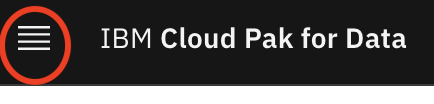
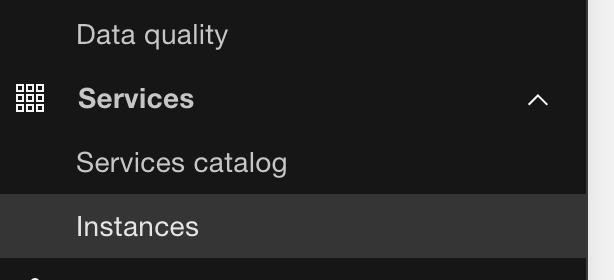
2. Then select "Open" on "Db2-Big-SQL-1"
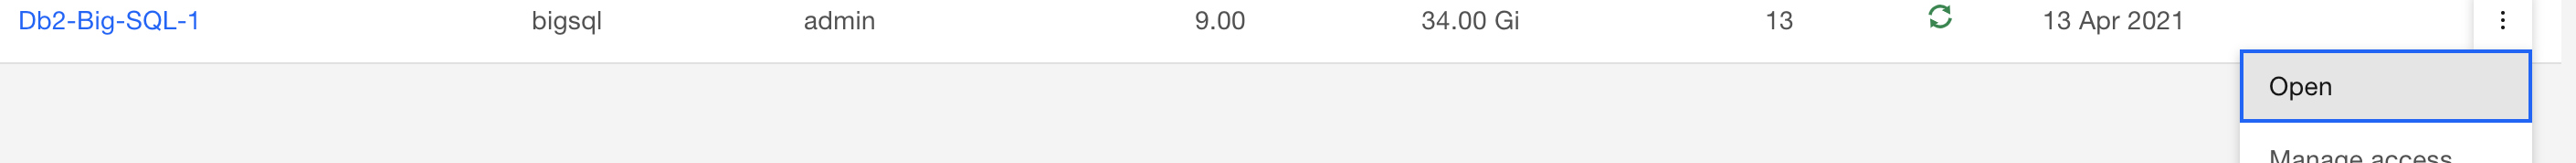
3. Checkout the Summary Page
See the available statistics on the starting page
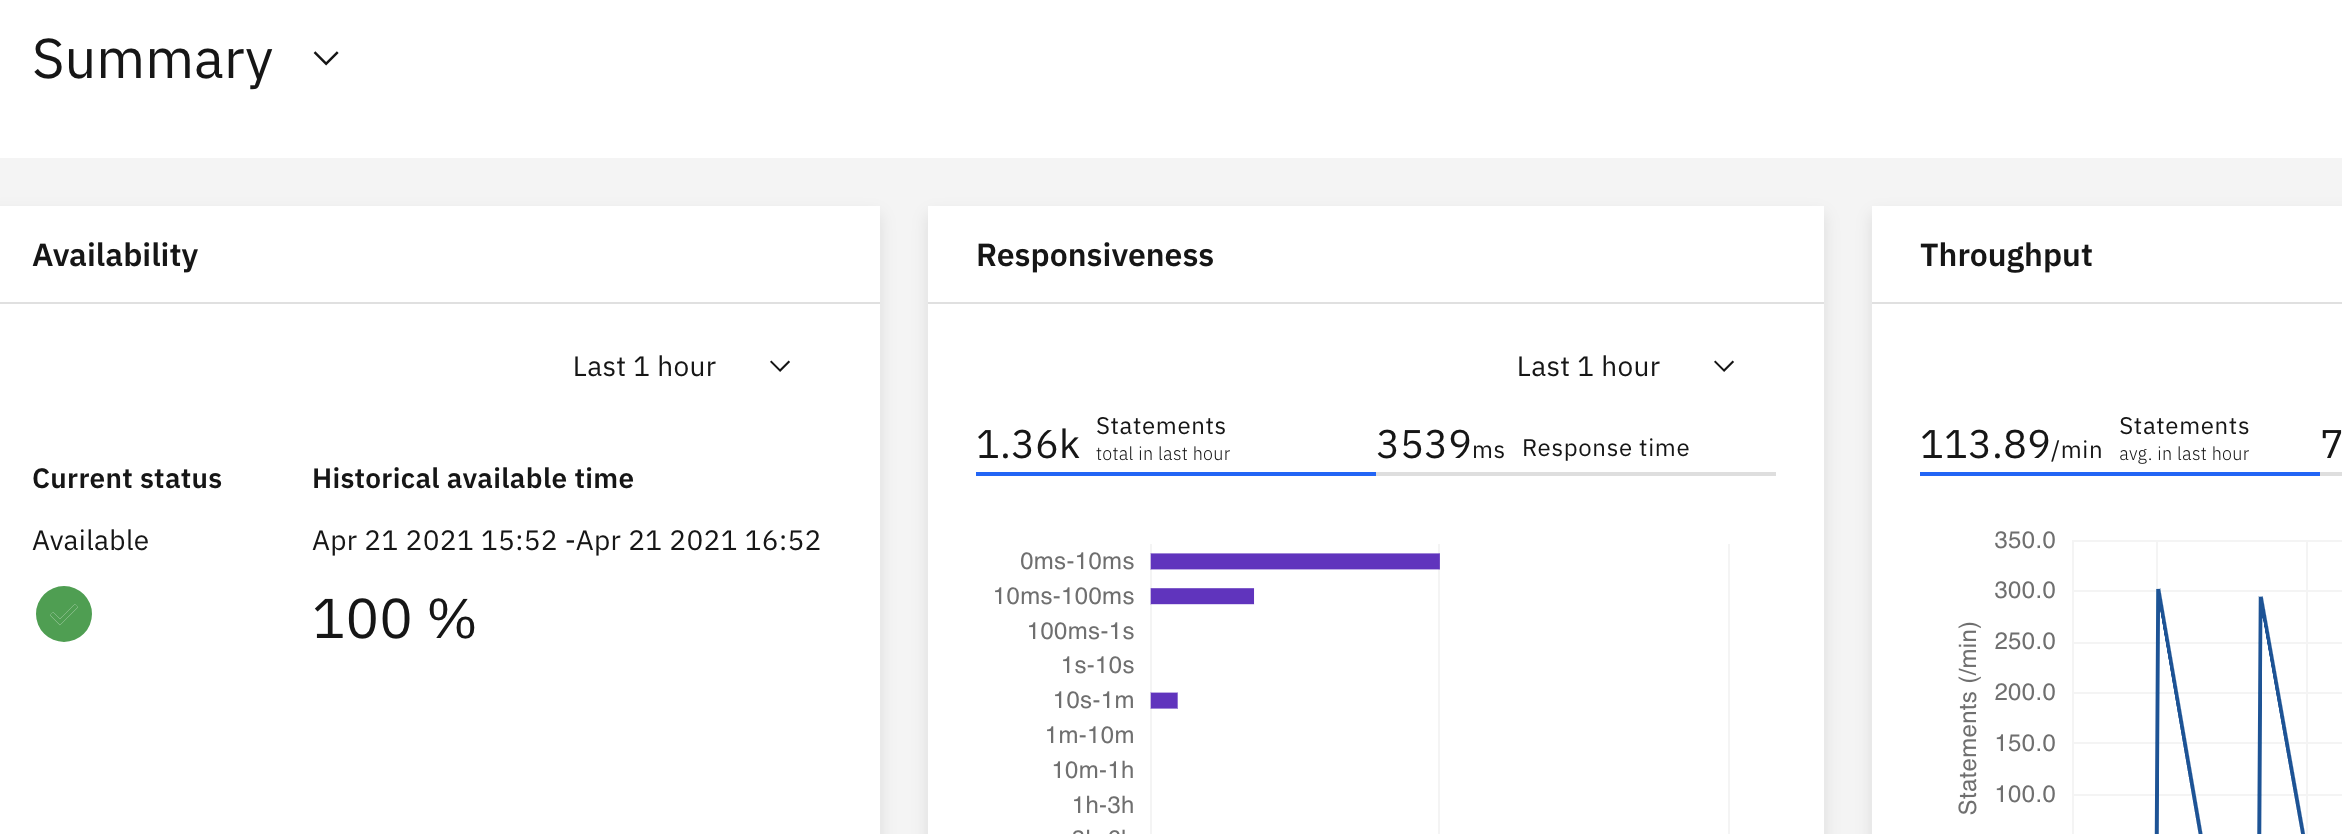

## 2 Use Db2 Big SQL
### Create the required objects
1. From the top left continue by opening "Run SQL"
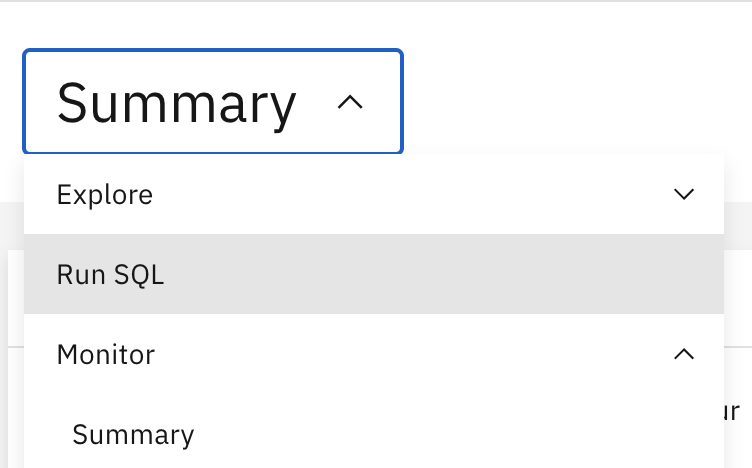
2. Open Script "BigSQL Create Tables"
You will create the BigSQL objects in your specific schema. For the csv (import) part this points to the shared "user00" bucket". The parquet / write part will use your own bucket. 
Follow the steps as described. You may invoke each statement one by one by selecting the statement and issue "Run Selected".
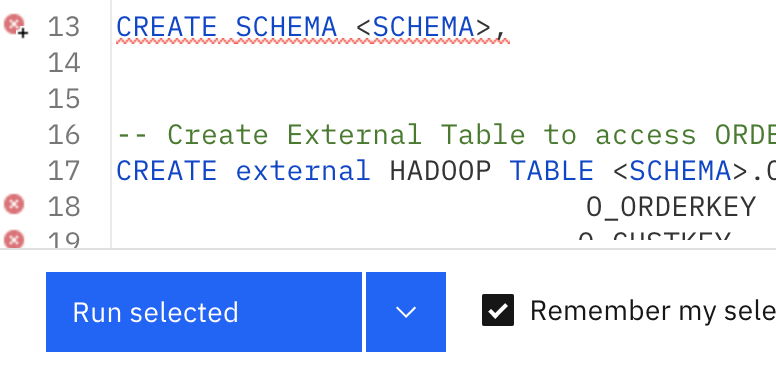
Open "TEMPLATE BigSQL Create Tables" and save it to \<your user\>BigSQL Create Tables
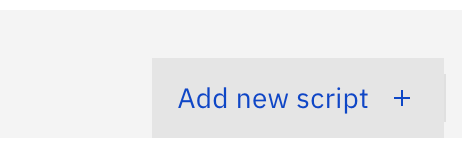   
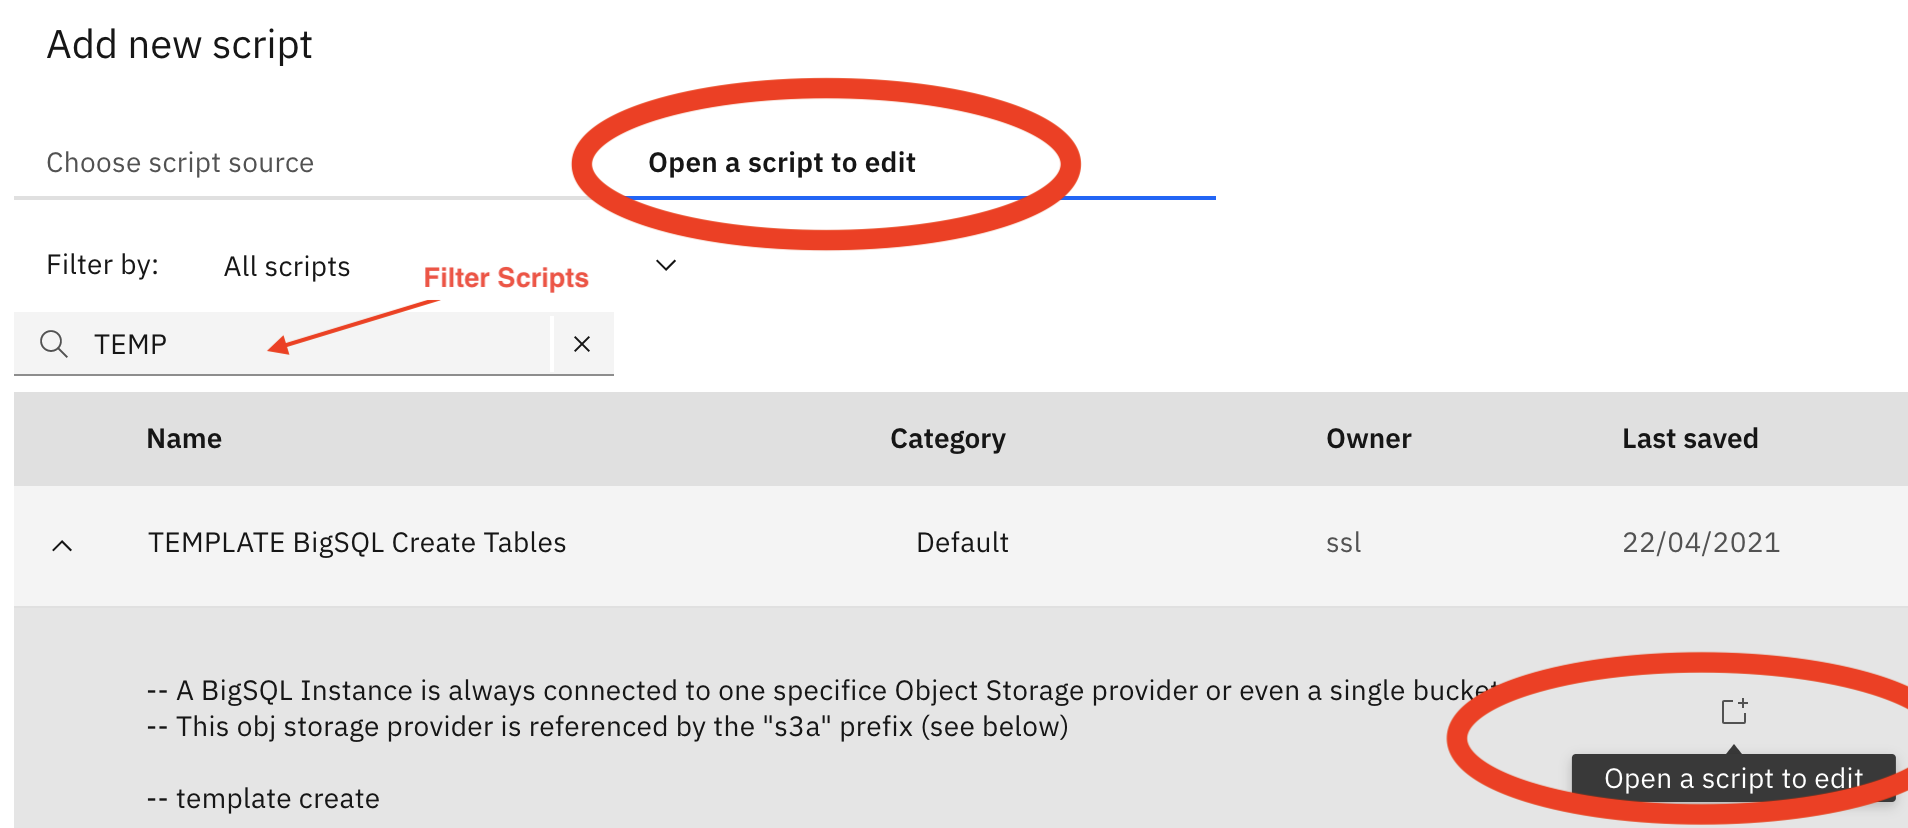   
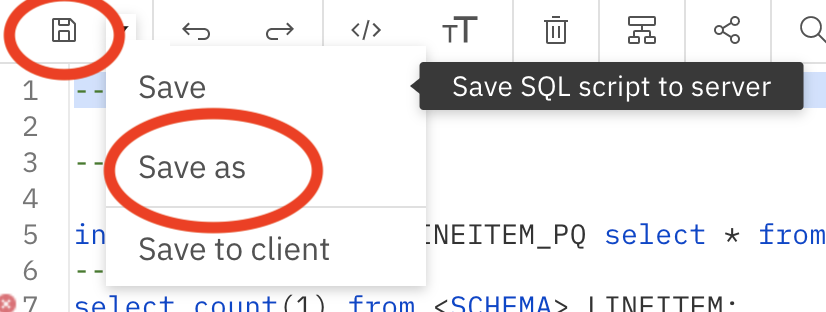   

### Steps Edit Script
1. Replace \<SCHEMA\> with your schema name (USER\<YOUR-ID>)
2. Replace \<bucket\> with your bucket name
2. Issue CREATE TABLE ... ORDERS statement to create a HADOOP table in your USER0N Schema, to query the preloaded CSV data 
2. Issue an SELECT statement to verify this was successfull
3. Issue CREATE TABLE ... ORDERS_PQ statement to cretate an HADOOP table that uses parquet format
4. Issue an SELECT statement to verify the parquet table successfully created
1. repeat the steps for LINEITEM and LINEITEM PQ
    
### Populate the created parquet tables
0. Customize the ETL Template
    - Open "TEMPLATE BigSQL Populate Tables" and save it to \<your user> BigSQL Populate Tables   
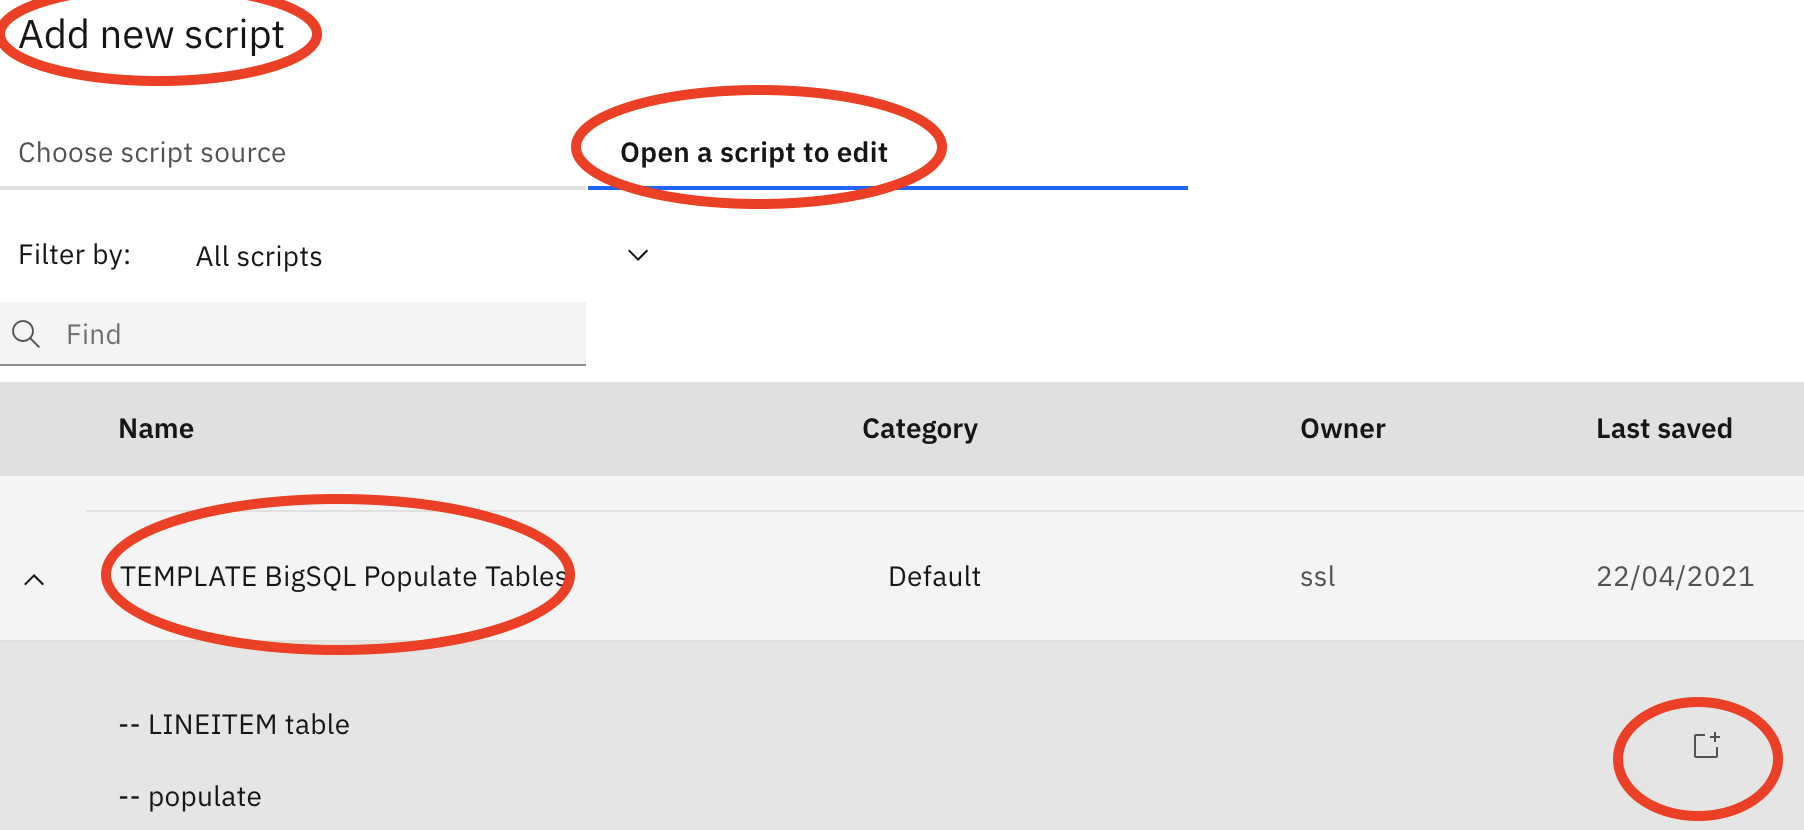   
    - Replace \<SCHEMA\> with your schema name (USER\<YOUR-ID>)
    - Replace \<bucket\> with your bucket name (bucket\<YOUR-ID>) 
    - !! bucket is case-sensitive - lowercase
1. Copy data from CSV input into the parquet table
    - "INSERT INTO USER0\<YOUR-ID>.ORDERS_PQ FROM SELECT * FROM USER00.ORDERS" 
2. Query parquet table
    - SELECT * FROM USER0\<YOUR-ID>.ORDERS_PQ
    - SELECT count(*) FROM USER0\<YOUR-ID>.ORDERS_PQ
2. Check created files in MinIO Browser 
    - Open Minio Browser in separate tab   
    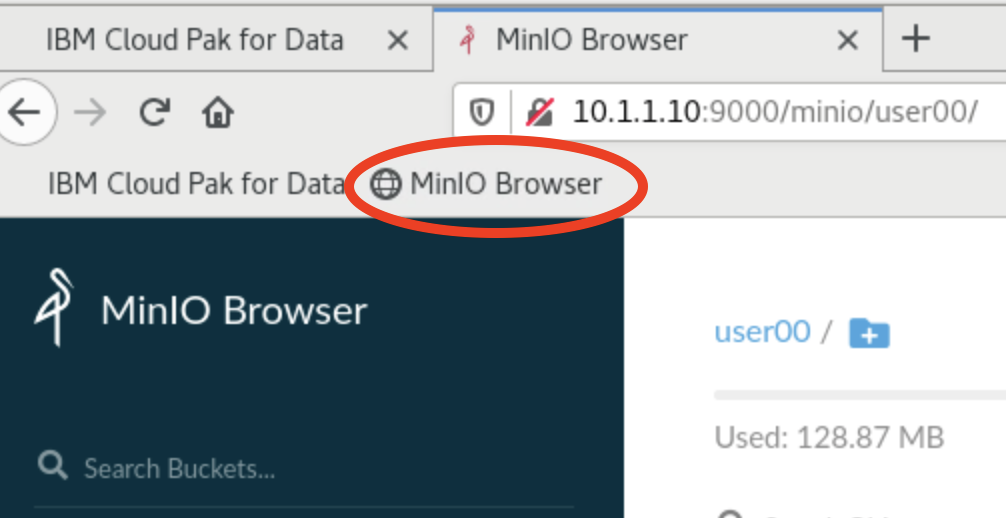    
    - login with Access Key = user\<YOUR-ID>, Secret Key = passuser\<YOUR-ID>
    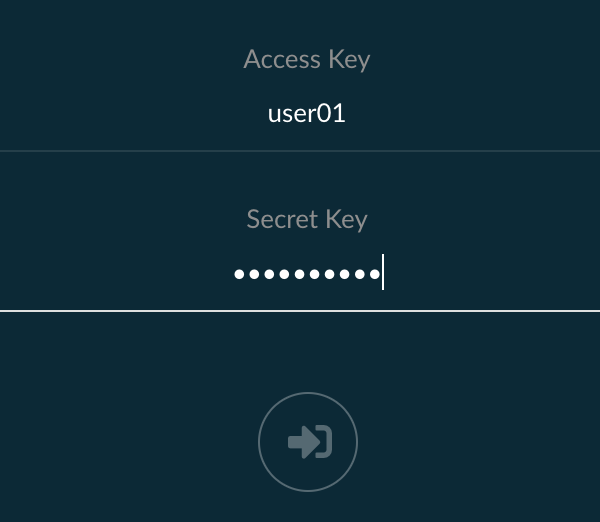
    - navigate to s3a://user\<YOUR-ID>/orders_pq
    - see the created files
3. [optional] Add some more contents
    - INSERT INTO USER\<YOUR-ID>.ORDERS_PQ again
    - verify the created Objects in MinIO Browser again
    - SELECT count(*) FROM USER\<YOUR-ID>.ORDERS_PQ
    - delete object from previous step in Minio Browser
    - see result of SELECT count(*) FROM USER\<YOUR-ID>.ORDERS_PQ 
2. DROP TABLE ORDERS_

### Populate the JSON Table with some lines
1. Issue CREATE TABLE ... ORDERS_JSON statement 
2. Issue an SELECT statement to verify this was successfull
3. Insert some lines
    - "INSERT INTO USER\<YOUR-ID>.ORDERS_JSON FROM SELECT * FROM USER00.ORDERS"
4. Download JSON file using MinIO browser 
    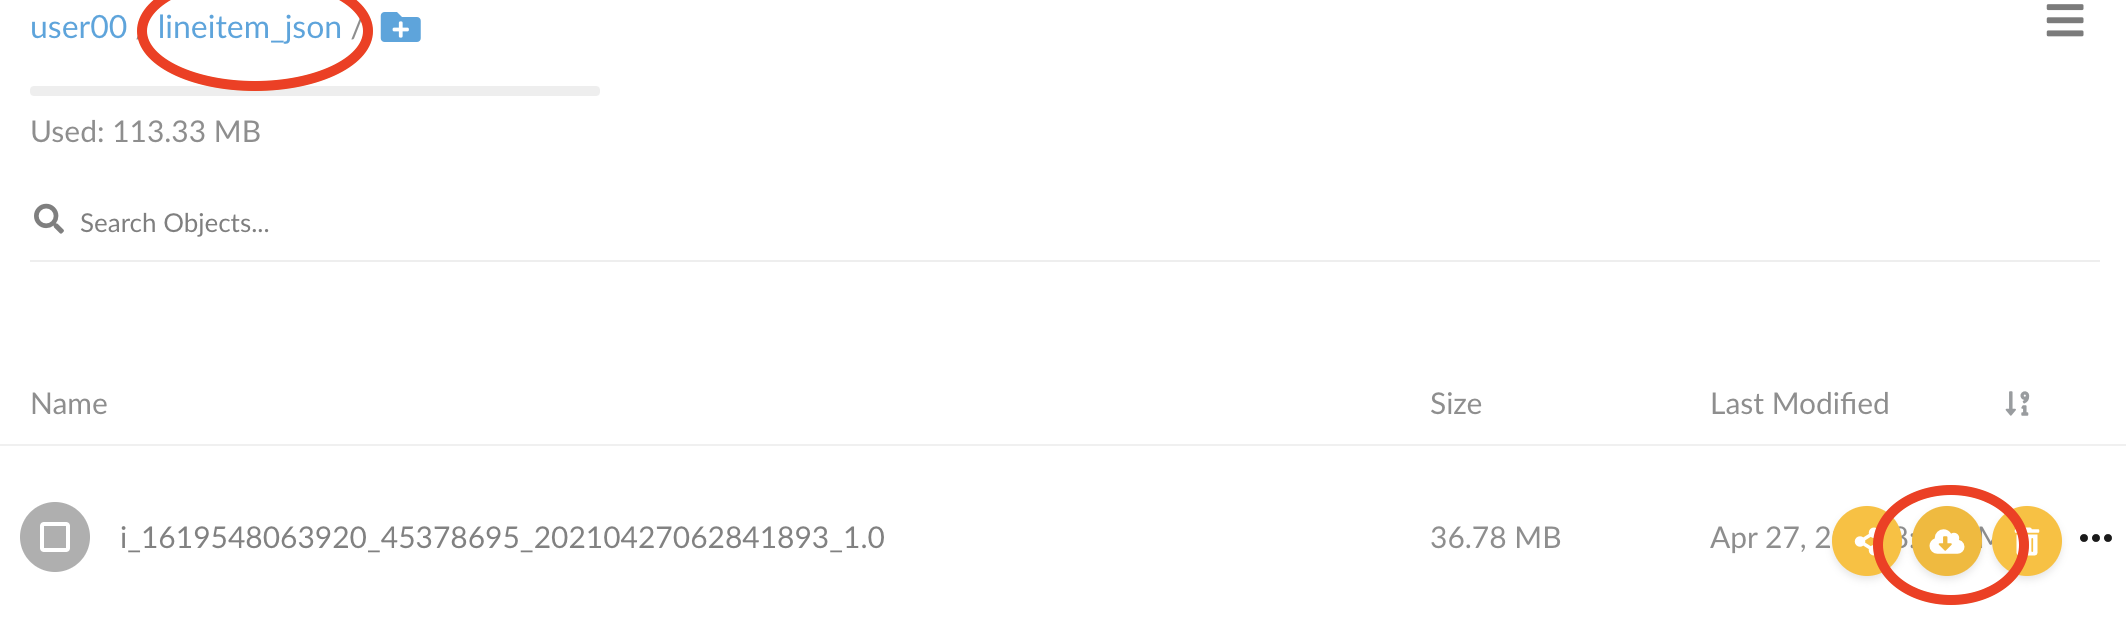
    - navigate to downloads folder
    - check file contents with your editor of choice
    - verify JSON formatting
5. [optional] see using complex / nested structures with JSON
    - check https://www.ibm.com/docs/sl/db2-big-sql/5.0.1?topic=types-big-sql-complex-data-json-data
